In [16]:
import sys
sys.path.insert(0, '..')
from utils import load_npy_image, load_tiff_image
import os
import matplotlib.pyplot as plt
import numpy as np
from preprocess_save_patches_Amazon import mask_no_considered
from skimage.util.shape import view_as_windows
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import cv2
import seaborn as sns

In [2]:
root_path = '/media/thimabru/ssd/TCC/imagens_satelite_dataset/cut_img_66_new'
# Load images --------------------------------------------------------------
img_t1_path = 'cut_raster_2018_ok.tif'
img_t2_path = 'cut_raster_2019_ok.tif'
img_t1 = load_tiff_image(os.path.join(root_path, img_t1_path))
print(type(img_t1))
img_t2 = load_tiff_image(os.path.join(root_path, img_t2_path))
print(img_t1.shape)
print(img_t2.shape)

/media/thimabru/ssd/TCC/imagens_satelite_dataset/cut_img_66_new/cut_raster_2018_ok.tif
<class 'numpy.ndarray'>
/media/thimabru/ssd/TCC/imagens_satelite_dataset/cut_img_66_new/cut_raster_2019_ok.tif
(7, 5222, 5043)
(7, 5222, 5043)


In [7]:
# Convert shape from C x H x W --> H x W x C
# Convert from float32 to uint8
img_t1 = img_t1.transpose((1, 2, 0))
img_t2 = img_t2.transpose((1, 2, 0))
input_image = np.concatenate((image_t1, image_t2), axis=-1)
# img_train_normalized = normalization(img_train)
print('Image 7 bands')
print(img_t1.shape)
print(img_t1.dtype)
print(img_t2.shape)
print(img_t2.dtype)
print(input_image.shape)
print(input_image.dtype)
print(img_t1.min(), img_t1.max())

Image 7 bands
(5222, 5043, 7)
uint16
(5222, 5043, 7)
uint16
(5222, 5043, 14)
uint16
4058 65535


In [13]:
img_t1_bgr = (img_t1[:, :, 1:4]).astype(np.uint8)
img_t1_rgb = img_t1_bgr[:, :, ::-1]
print(img_t1_rgb.min(), img_t1_rgb.max())

0 255


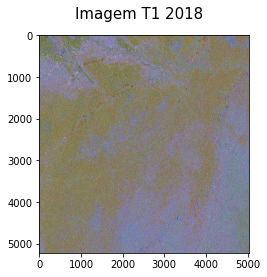

In [14]:
fig = plt.figure()
fig.suptitle('Imagem T1 2018', fontsize=15)
plt.imshow(img_t1_rgb)

0.0 24389.79805001354
(5222, 5043)


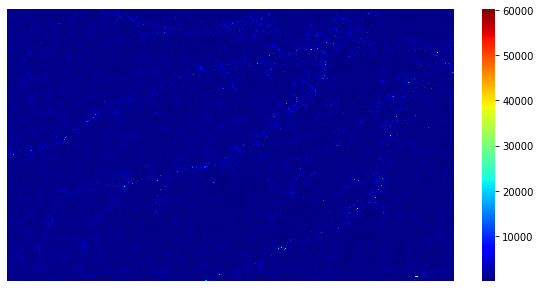

In [25]:
#%% ************ CVA ************
image_t1 = img_t1
image_t2 = img_t2
import math
blue_t1 = image_t1[:,:,1]
red_t1 = image_t1[:,:,3]
nir_t1 = image_t1[:,:,4]
swir_t1 = image_t1[:,:,5]

blue_t2 = image_t2[:,:,1]
red_t2 = image_t2[:,:,3]
nir_t2 = image_t2[:,:,4]
swir_t2 = image_t2[:,:,5]

# NDVI and BI index
ndvi1 = (nir_t1-red_t1)/(nir_t1+red_t1)
bi1 = (swir_t1+red_t1)-(nir_t1+blue_t1)/(swir_t1+red_t1)+(nir_t1+blue_t1)

ndvi2 = (nir_t2-red_t2)/(nir_t2+red_t2)
bi2 = (swir_t2+red_t2)-(nir_t2+blue_t2)/(swir_t2+red_t2)+(nir_t2+blue_t2)
print(np.min(ndvi1), np.min(bi1))

# Calculating the change:
S =(ndvi2-ndvi1)**2+(bi2-bi1)**2
S1 = np.sqrt(S)

print(S1.shape)
plt.figure(figsize=(10,5))
ax = sns.heatmap(S1, cmap="jet")
ax.set_axis_off()


/media/thimabru/ssd/TCC/imagens_satelite_dataset/cut_img_66_new/cut_ref_2019_ok.tif
Image reference shape: (5222, 5043)


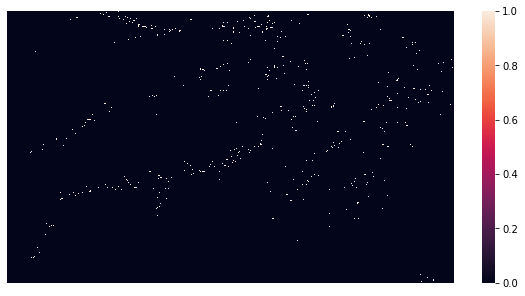

In [21]:
'''
    0 --> No deforastation
    1 --> Deforastation
'''
image_ref = load_tiff_image(os.path.join(root_path,
                                        'cut_ref_2019_ok.tif'))
# Clip to fit tiles of your specific image
# image_ref = image_ref[:6100, :6600]
# image_ref[img_mask_ref == -99] = -1
print(f"Image reference shape: {image_ref.shape}")
plt.figure(figsize=(10,5))
ax = sns.heatmap(image_ref)
ax.set_axis_off()

In [19]:
print(S1)

[[ 910.95118004 1278.88294275  308.93511392 ...  346.00368559
    29.94141855 1162.94666712]
 [ 643.9687698  1555.95892278  223.98401161 ...  285.97844016
   361.97849712  239.95953951]
 [2564.89905421  997.99994905  119.03339948 ...  799.89334595
   240.99777681  847.96713039]
 ...
 [1040.9296902   989.99617937   24.01685845 ...  471.97859369
   379.00361196 1315.96980533]
 [1364.95446825  656.96858348   19.00684812 ...   47.00839609
   614.9973968   169.0149802 ]
 [ 369.99579308  301.01833283 1045.93980889 ... 1597.91369186
   114.9872681   121.9501521 ]]
